In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join, dirname, isfile, basename
from os import getcwd, listdir
import math

In [2]:
unprocessed_dir = join(join(dirname(getcwd()), 'unprocessed'), 'well production')

In [3]:
def get_frack_stages(filename):
    data = pd.read_csv(filename)
    proppant_weight = data['proppant weight (lbs)']
    count = 0
    for i in proppant_weight:
        if not math.isnan(i):
            count = count + 1
    return count

In [4]:
def get_proppants(filename):
    data = pd.read_csv(filename)
    proppant_weight = data['proppant weight (lbs)']
    proppant = 0
    for i in proppant_weight:
        if not math.isnan(i):
            proppant = proppant + i
    return proppant

In [5]:
def get_pump_rates(filename):
    data = pd.read_csv(filename)
    pump_rate_vals = data['pump rate (cubic feet/min)']
    pump_rate = 0
    for i in pump_rate_vals:
        if not math.isnan(i):
            pump_rate = pump_rate + i
    return pump_rate

In [6]:
well_names = []
frack_stages = []
proppant_sums = []
pump_rate_sums = []

for filename in os.listdir(unprocessed_dir):
    if filename.endswith(".csv") and not "well production" in filename:
        data_file = join(unprocessed_dir, filename)
        well_names.append(filename[:-4])
        frack_stages.append(get_frack_stages(data_file))
        proppant_sums.append(get_proppants(data_file))
        pump_rate_sums.append(get_pump_rates(data_file))

In [7]:
frack_stage_data = pd.DataFrame()
frack_stage_data['Well Name'] = well_names
frack_stage_data['Frack Stages'] = frack_stages
frack_stage_data['Proppant Sums'] = proppant_sums

proppant_means = frack_stage_data['Proppant Sums'] / frack_stage_data['Frack Stages']
frack_stage_data["Proppant Means"] = proppant_means

frack_stage_data['Pump Rate Sums'] = pump_rate_sums

pump_rate_means = frack_stage_data['Pump Rate Sums'] / frack_stage_data['Frack Stages']
frack_stage_data["Pump Rate Means"] = pump_rate_means

frack_stage_data

,Well Name,Frack Stages,Proppant Sums,Proppant Means,Pump Rate Sums,Pump Rate Means
0,Brisket 1-204H,50,3.674196e+07,734839.237574,14786.452314,295.729046
1,Brisket 1-44H,12,7.550050e+06,629170.856472,3585.262636,298.771886
2,Brisket 10-65H,50,4.035360e+07,807072.059668,15139.089025,302.781780
3,Brisket 2-149H,50,4.371680e+07,874335.919457,14906.684574,298.133691
4,Brisket 3-212H,25,1.712481e+07,684992.449778,7303.826972,292.153079
5,Brisket 6-50H,50,4.266760e+07,853351.979814,14923.474570,298.469491
6,Brisket 7-105H,5,2.708245e+06,541649.059649,1399.647401,279.929480
7,Brisket 7-212H,34,2.825383e+07,830995.127477,10554.941405,310.439453
8,Brisket 9-106H,34,2.289625e+07,673418.998538,10351.422778,304.453611
9,Burger 10-170H,34,2.315055e+07,680898.663980,10495.121460,308.680043


In [8]:
print('Total number of frack stages: ', frack_stage_data["Frack Stages"].sum())
print('Mean frack stages: ', frack_stage_data["Frack Stages"].mean())
print('Total mean of proppant sums: ', frack_stage_data["Proppant Sums"].mean())
print('Total mean of proppant means: ', frack_stage_data["Proppant Means"].mean())
print('Total mean of pump rate sums: ', frack_stage_data["Pump Rate Sums"].mean())
print('Total mean of pump rate means: ', frack_stage_data["Pump Rate Means"].mean())

Total number of frack stages:  4027
Mean frack stages:  40.27
Total mean of proppant sums:  30734453.002652477
Total mean of proppant means:  749707.0251218535
Total mean of pump rate sums:  12133.469787690736
Total mean of pump rate means:  301.15995144755703


In [9]:
well_production_data = pd.read_csv(join(unprocessed_dir, 'well production.csv'))
well_production_data

,Unnamed: 0,well name,average pressure (Pa),oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,oil 7,...,water 3,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12
0,0,Tarragon 4-119H,26180969,10809.0,10108.0,9352.0,8626.0,7856.0,7137.0,6430.0,...,1600.0,1481.0,1367.0,1237.0,1069.0,982.0,857.0,733.0,593.0,472.0
1,1,Fennel 10-129H,36433680,2049.0,1932.0,1784.0,1649.0,1499.0,1364.0,1226.0,...,254.0,210.0,205.0,200.0,157.0,148.0,136.0,97.0,91.0,87.0
2,2,Federal 14-113H,36642888,11699.0,10905.0,10149.0,9365.0,8521.0,7732.0,6919.0,...,720.0,661.0,617.0,541.0,466.0,435.0,394.0,340.0,266.0,213.0
3,3,King 7-184H,30429506,5980.0,5580.0,5176.0,4789.0,4405.0,3978.0,3581.0,...,502.0,471.0,453.0,417.0,346.0,343.0,275.0,231.0,238.0,164.0
4,4,Sundae 1-129H,42591950,3892.0,3646.0,3399.0,3133.0,2834.0,2577.0,2309.0,...,1096.0,974.0,902.0,806.0,790.0,668.0,570.0,468.0,394.0,322.0
5,5,State 3-95H,35821548,2854.0,2682.0,2499.0,2297.0,2112.0,1887.0,1706.0,...,643.0,565.0,544.0,460.0,438.0,417.0,315.0,300.0,240.0,224.0
6,6,Tribal 11-185H,36060626,5043.0,4715.0,4378.0,4025.0,3661.0,3344.0,3030.0,...,647.0,613.0,567.0,500.0,445.0,386.0,366.0,313.0,273.0,218.0
7,7,Laramie 14-76H,33772275,9033.0,8448.0,7834.0,7206.0,6562.0,5971.0,5376.0,...,2175.0,2006.0,1834.0,1678.0,1511.0,1319.0,1149.0,985.0,813.0,645.0
8,8,Federal 12-111H,25647536,8827.0,8251.0,7625.0,7064.0,6451.0,5861.0,5220.0,...,1687.0,1551.0,1416.0,1316.0,1151.0,1042.0,893.0,767.0,631.0,506.0
9,9,State 4-189H,34175416,9987.0,9360.0,8653.0,7969.0,7296.0,6594.0,5928.0,...,60.0,35.0,55.0,40.0,61.0,29.0,49.0,23.0,25.0,31.0


In [10]:
frack_stage_data['12-Month Oil Sums'] = 0

In [11]:
for row in well_production_data.index:
    index = 0
    for i in frack_stage_data.index:
        if (frack_stage_data.iloc[i]["Well Name"] == well_production_data.iloc[row]['well name']):
            index = i
            break
    well_oil_sum = 0
    for i in range(1, 13):
        well_oil_sum = well_oil_sum + well_production_data.iloc[row]['oil ' + str(i)]
    frack_stage_data.loc[index, '12-Month Oil Sums'] = well_oil_sum
frack_stage_data

,Well Name,Frack Stages,Proppant Sums,Proppant Means,Pump Rate Sums,Pump Rate Means,12-Month Oil Sums
0,Brisket 1-204H,50,3.674196e+07,734839.237574,14786.452314,295.729046,14080.0
1,Brisket 1-44H,12,7.550050e+06,629170.856472,3585.262636,298.771886,15245.0
2,Brisket 10-65H,50,4.035360e+07,807072.059668,15139.089025,302.781780,68036.0
3,Brisket 2-149H,50,4.371680e+07,874335.919457,14906.684574,298.133691,105659.0
4,Brisket 3-212H,25,1.712481e+07,684992.449778,7303.826972,292.153079,32030.0
5,Brisket 6-50H,50,4.266760e+07,853351.979814,14923.474570,298.469491,22886.0
6,Brisket 7-105H,5,2.708245e+06,541649.059649,1399.647401,279.929480,2493.0
7,Brisket 7-212H,34,2.825383e+07,830995.127477,10554.941405,310.439453,17947.0
8,Brisket 9-106H,34,2.289625e+07,673418.998538,10351.422778,304.453611,31234.0
9,Burger 10-170H,34,2.315055e+07,680898.663980,10495.121460,308.680043,40459.0


Text(0, 0.5, '12-Month Oil Sums')

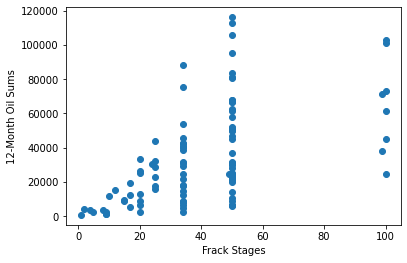

In [12]:
plt.scatter(frack_stage_data['Frack Stages'],frack_stage_data['12-Month Oil Sums'], alpha=1)
plt.xlabel('Frack Stages')
plt.ylabel('12-Month Oil Sums')

Text(0, 0.5, '12-Month Oil Sums')

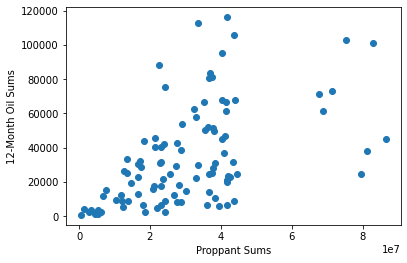

In [13]:
plt.scatter(frack_stage_data['Proppant Sums'],frack_stage_data['12-Month Oil Sums'], alpha=1)
plt.xlabel('Proppant Sums')
plt.ylabel('12-Month Oil Sums')

Text(0, 0.5, '12-Month Oil Sums')

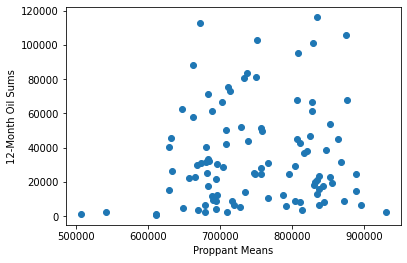

In [14]:
plt.scatter(frack_stage_data['Proppant Means'],frack_stage_data['12-Month Oil Sums'], alpha=1)
plt.xlabel('Proppant Means')
plt.ylabel('12-Month Oil Sums')

Text(0, 0.5, '12-Month Oil Sums')

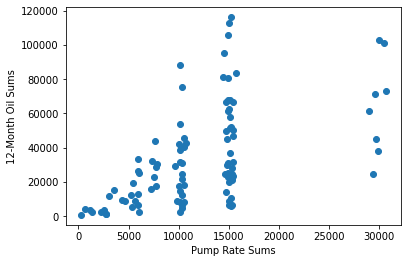

In [15]:
plt.scatter(frack_stage_data['Pump Rate Sums'],frack_stage_data['12-Month Oil Sums'], alpha=1)
plt.xlabel('Pump Rate Sums')
plt.ylabel('12-Month Oil Sums')

Text(0, 0.5, '12-Month Oil Sums')

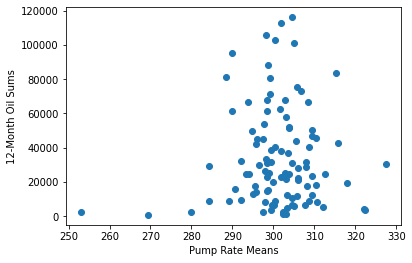

In [16]:
plt.scatter(frack_stage_data['Pump Rate Means'],frack_stage_data['12-Month Oil Sums'], alpha=1)
plt.xlabel('Pump Rate Means')
plt.ylabel('12-Month Oil Sums')